# Karar Ağacı

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv('CVD_cleaned.csv', encoding='ISO-8859-1')
x = data.drop('Heart_Disease', axis=1) #ileride karışıklık matrisi için kullanıldı
y=data['Heart_Disease']#ileride karışıklık matrisi için kullanıldı

In [ ]:
unique_categories = data['Checkup'].unique()#kategori isimleri kontrol etmek için
unique_categories

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', nan, 'Within the past 5 years', 'Never'],
      dtype=object)

In [ ]:
# Belirli kategorileri 0 ile değiştirme
data.loc[data['Age_Category'] == '18-24', 'Age_Category'] = 0
data.loc[data['Age_Category'] == '25-29', 'Age_Category'] = 0
data.loc[data['Age_Category'] == '30-34', 'Age_Category'] = 0
data.loc[data['Age_Category'] == '35-39', 'Age_Category'] = 0
data.loc[data['Age_Category'] == '40-44', 'Age_Category'] = 0
data.loc[data['Age_Category'] == '45-49', 'Age_Category'] = 0
data.loc[data['Age_Category'] == '50-54', 'Age_Category'] = 1
data.loc[data['Age_Category'] == '55-59', 'Age_Category'] = 1
data.loc[data['Age_Category'] == '60-64', 'Age_Category'] = 1
data.loc[data['Age_Category'] == '65-69', 'Age_Category'] = 1
data.loc[data['Age_Category'] == '70-74', 'Age_Category'] = 1
data.loc[data['Age_Category'] == '75-79', 'Age_Category'] = 1
data.loc[data['Age_Category'] == '80+', 'Age_Category'] = 1
data.loc[data['General_Health'] == 'Very Good', 'General_Health'] = 1
data.loc[data['General_Health'] == 'Good', 'General_Health'] = 1
data.loc[data['General_Health'] == 'Excellent', 'General_Health'] = 1
data.loc[data['General_Health'] == 'Fair', 'General_Health'] = 0
data.loc[data['General_Health'] == 'Poor', 'General_Health'] = 0
data.loc[data['Checkup'] == '5 or more years ago', 'Checkup'] = 1
data.loc[data['Checkup'] == 'Within the past year', 'Checkup'] = 1
data.loc[data['Checkup'] == 'Within the past 2 years', 'Checkup'] = 1
data.loc[data['Checkup'] == 'Within the past 5 years', 'Checkup'] = 1
data.loc[data['Checkup'] == 'Never', 'Checkup'] = 0



data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Gender,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,1,No,No,No,No,No,No,Yes,Female,1,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,1,1,No,Yes,No,No,No,Yes,No,Female,1,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,1,1,Yes,No,No,No,No,Yes,No,Female,1,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,0,1,Yes,Yes,No,No,No,Yes,No,Male,1,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,1,1,No,No,No,No,No,No,No,Male,1,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249175,1,1,Yes,No,No,No,No,No,No,Female,0,173.0,81.65,27.37,No,12.0,30.0,10.0,20.0
249176,0,1,No,No,No,No,No,No,Yes,Male,0,183.0,122.92,36.75,Yes,0.0,30.0,0.0,0.0
249177,1,1,Yes,No,No,No,No,No,No,Female,0,163.0,72.57,27.46,Yes,1.0,30.0,20.0,5.0
249178,1,1,Yes,No,No,No,No,Yes,Yes,Female,1,163.0,90.72,34.33,Yes,3.0,90.0,20.0,8.0


In [ ]:
#değişkenleri kodlama
data.Exercise=[1 if kod=="Yes" else 0 for kod in data.Exercise]
data.Heart_Disease=[1 if kod=="Yes" else 0 for kod in data.Heart_Disease]
data.Skin_Cancer=[1 if kod=="Yes" else 0 for kod in data.Skin_Cancer]
data.Other_Cancer=[1 if kod=="Yes" else 0 for kod in data.Other_Cancer]
data.Depression=[1 if kod=="Yes" else 0 for kod in data.Depression]
data.Diabetes=[1 if kod=="Yes" else 0 for kod in data.Diabetes]
data.Arthritis=[1 if kod=="Yes" else 0 for kod in data.Arthritis]
data.Gender=[1 if kod=="Male" else 0 for kod in data.Gender]
data.Smoking_History=[1 if kod=="Yes" else 0 for kod in data.Smoking_History]

data = data.dropna(axis=0)
data = data.dropna(axis=1)

data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Gender,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,1,0,0,0,0,0,0,1,0,1,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,1,1,0,1,0,0,0,1,0,0,1,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,1,1,1,0,0,0,0,1,0,0,1,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,1,1,1,0,0,0,1,0,1,1,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,1,1,0,0,0,0,0,0,0,1,1,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249174,1,1,1,0,1,0,0,0,0,0,1,163.0,54.43,20.60,0,30.0,24.0,16.0,12.0
249175,1,1,1,0,0,0,0,0,0,0,0,173.0,81.65,27.37,0,12.0,30.0,10.0,20.0
249176,0,1,0,0,0,0,0,0,1,1,0,183.0,122.92,36.75,1,0.0,30.0,0.0,0.0
249177,1,1,1,0,0,0,0,0,0,0,0,163.0,72.57,27.46,1,1.0,30.0,20.0,5.0


In [ ]:
from sklearn.model_selection import train_test_split

# Veri setini bağımsız değişkenler (X) ve hedef değişken (y) olarak ayırma
X = data.drop('Heart_Disease', axis=1)  # Bağımsız değişkenler
y = data['Heart_Disease']  # Hedef değişken

# Veriyi eğitim ve test setlerine ayırma (%80 eğitim, %20 test olarak)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test setlerinin boyutlarını kontrol etme
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)


Eğitim seti boyutu: (193204, 18)
Test seti boyutu: (48301, 18)


In [ ]:
# Karar ağacı modelini oluşturma ve eğitme
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

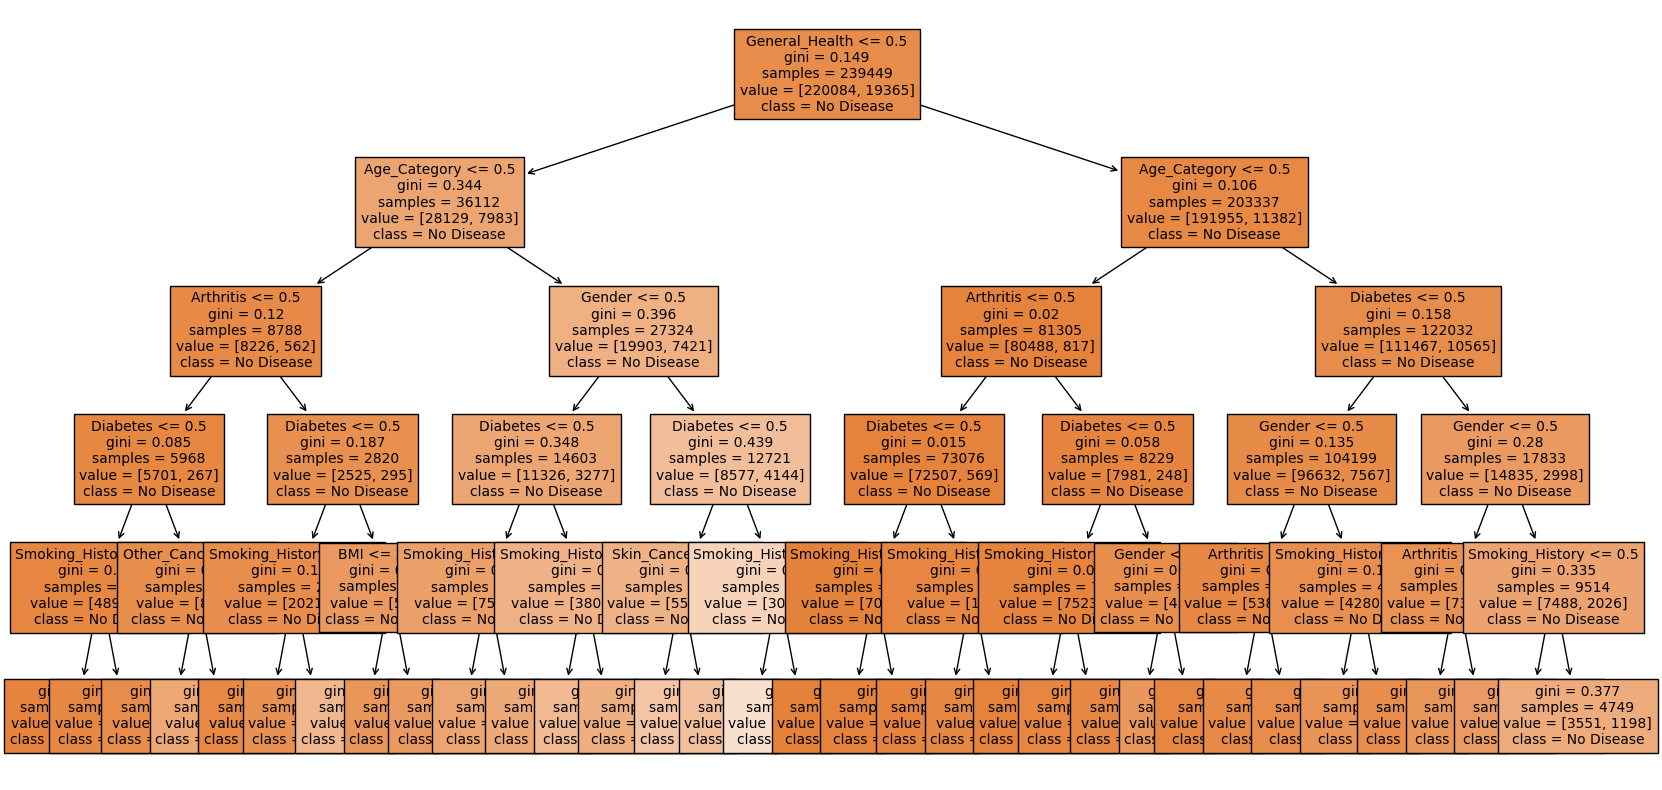

In [ ]:
# Karar ağacını görselleştirme
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))  # Daha büyük bir grafik boyutu
plot_tree(decision_tree, filled=True, fontsize=10, feature_names=X.columns, class_names=['No Disease', 'Heart Disease'])
plt.show()

# F1 SCORE

F1 Skor Puanı
 Modellerin performansını değerlendirmek için hassasiyet ve hatırlamayı birleştiren bir ölçümdür. Duyarlılık ve kesinlik ölçütlerinin harmonik ortalaması alınarak elde edilir.
F1 Skor = 2x(KesinlikxDuyarlılık)/(Kesinlik+Duyarlılık)


In [ ]:
# Benzersiz sınıf isimlerini belirleme
class_names = y.unique()

# Sınıf isimlerini sıralı bir listeye dönüştürme
class_names = list(class_names)


In [ ]:
y_pred = decision_tree.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

# Karışıklık matrisi oluşturma
cm = confusion_matrix(y_test, y_pred)
print("Karışıklık Matrisi:")
print(cm)


Karışıklık Matrisi:
[[44411     1]
 [ 3889     0]]


In [ ]:
# Modelin tahmin ettiği sınıflar
predicted_classes = decision_tree.classes_

# Sınıf isimlerinin doğru olduğundan emin olun
print("Tahmin edilen sınıflar:", predicted_classes)
print("Gerçek sınıf isimleri:", class_names)


Tahmin edilen sınıflar: [0 1]
Gerçek sınıf isimleri: ['No', 'Yes', nan]


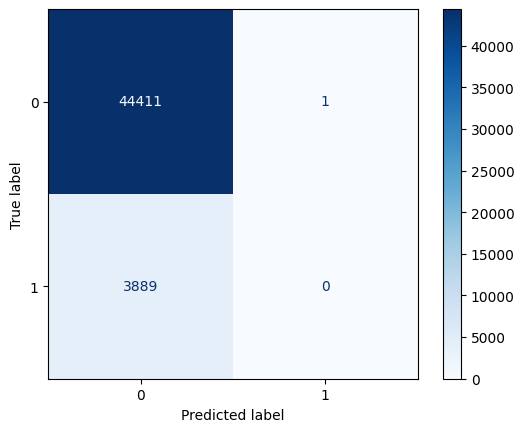

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Karışıklık matrisini matplotlib ile görselleştirme
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=predicted_classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred, )
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy-Doğruluk:", accuracy)
print("Precision-Kesinlik:", precision)
print("Recall-Duyarlılık:", recall)

print("Classification Report-Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


Accuracy-Doğruluk: 0.9194633651477195
Precision-Kesinlik: 0.8454494197296174
Recall-Duyarlılık: 0.9194633651477195
Classification Report-Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     44412
           1       0.00      0.00      0.00      3889

    accuracy                           0.92     48301
   macro avg       0.46      0.50      0.48     48301
weighted avg       0.85      0.92      0.88     48301



In [ ]:
from sklearn.metrics import classification_report, f1_score
f1 = f1_score(y_test, y_pred, average='weighted') #ağırlıklı F1 puanını hesaplar average sayesinde
print(f"F1 Skoru: {f1}")


F1 Skoru: 0.8809044562287626


model %88 doğru tahmin yapmaktadır